<a href="https://colab.research.google.com/github/Haris-09/Machine-Learning/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from sklearn.cluster import KMeans

In [2]:
data1 = [
    [23, 89, 78, 34],
    [12, 45, 67, 13],
    [12, 33, 22, 12],
    [3,4 ,89, 45],
    [1, 2, 3, 1000]
]

In [3]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [4]:
model = km.fit(data1)

In [5]:
l1 = model.labels_
l1

array([0, 0, 0, 0, 1], dtype=int32)

In [6]:
for data, c1 in zip(data1, l1):
    print(data, c1)

[23, 89, 78, 34] 0
[12, 45, 67, 13] 0
[12, 33, 22, 12] 0
[3, 4, 89, 45] 0
[1, 2, 3, 1000] 1


# Task
Analyze customer data from "customer_data.csv" using K-Means clustering on 'AnnualIncome' and 'SpendingScore' to identify distinct customer segments, visualize the clusters, and characterize each segment.

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/Haris-09/Machine-Learning/refs/heads/main/Datasets/customer.csv")
df.head()

,CustomerID,Age,AnnualIncome,SpendingScore,NumPurchases
0,1,56,43483,8,30
1,2,46,68555,88,37
2,3,32,37159,63,23
3,4,60,100077,11,39
4,5,25,55920,81,45


## Select relevant features

### Subtask:
Select relevant features for clustering, such as 'AnnualIncome' and 'SpendingScore'.


**Reasoning**:
Create a new DataFrame with only the 'AnnualIncome' and 'SpendingScore' columns for clustering.



In [8]:
X = df[['AnnualIncome', 'SpendingScore']]

## Normalize the selected features

### Subtask:
Normalize the selected features using `StandardScaler` from `sklearn.preprocessing`.


**Reasoning**:
Import the necessary scaler and scale the features.



In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Apply k-means clustering

### Subtask:
Apply K-Means clustering with different values of `k` (e.g., 3, 4, 5) to find an optimal number of clusters.


**Reasoning**:
Iterate through different values of k, fit KMeans to the scaled data, and store the inertia values and the fitted models.



In [10]:
inertia_values = []
kmeans_models = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    kmeans_models[k] = kmeans

## Visualize the clusters

### Subtask:
Visualize the clusters in a 2D scatter plot, using 'AnnualIncome' and 'SpendingScore' as the axes, and color-coding the points by their assigned cluster.


**Reasoning**:
Import necessary libraries for plotting and choose a reasonable number of clusters for visualization.



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

chosen_k = 5 # Choosing 5 clusters for visualization as a reasonable starting point

**Reasoning**:
Get the cluster labels from the chosen K-Means model and create a new DataFrame with the original features and cluster labels for plotting.



In [12]:
cluster_labels = kmeans_models[chosen_k].labels_

df_clustered = X.copy()
df_clustered['Cluster'] = cluster_labels

**Reasoning**:
Create a scatter plot to visualize the clusters using 'AnnualIncome' and 'SpendingScore' and color-code by cluster labels.



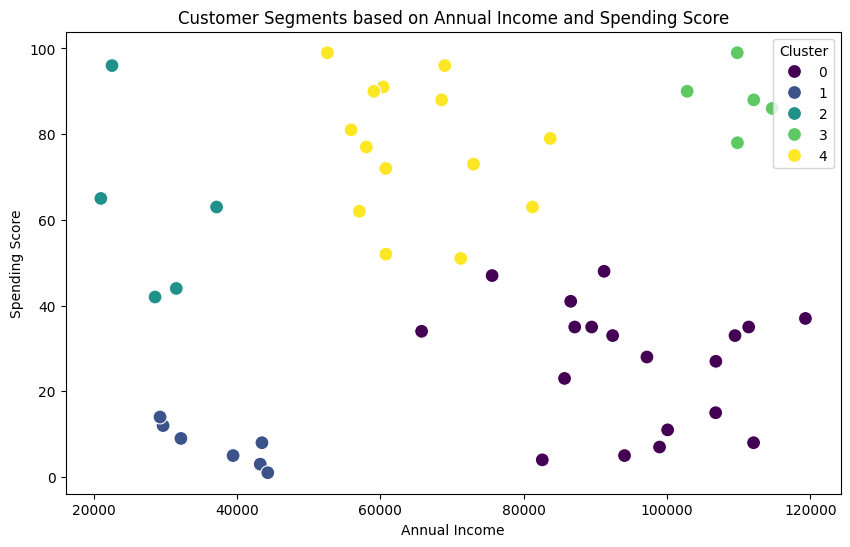

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clustered, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Analyze the characteristics of each cluster

### Subtask:
Analyze the characteristics of each cluster based on the selected features and potentially other columns in the dataset.


**Reasoning**:
Group the clustered DataFrame by 'Cluster' and calculate the mean for the relevant columns.



In [14]:
df_merged = pd.merge(df_clustered, df[['CustomerID', 'Age', 'NumPurchases']], left_index=True, right_index=True)

cluster_characteristics = df_merged.groupby('Cluster')[['AnnualIncome', 'SpendingScore', 'Age', 'NumPurchases']].mean()

print("Cluster Characteristics:")
display(cluster_characteristics)

Cluster Characteristics:


,AnnualIncome,SpendingScore,Age,NumPurchases
Cluster,,,,
0,95395.421053,26.631579,43.789474,29.684211
1,37376.000000,7.428571,30.428571,20.857143
2,28169.600000,62.000000,35.600000,30.400000
3,109831.000000,88.200000,46.800000,18.400000
4,65095.857143,76.714286,39.285714,29.785714


## Summary:

### Data Analysis Key Findings

*   The customer data was successfully clustered into 5 distinct segments based on 'AnnualIncome' and 'SpendingScore'.
*   The clusters show variations in average income, spending habits, age, and number of purchases, allowing for distinct segment interpretations.
*   For example, one cluster might represent high-income/low-spending customers, while another represents low-income/high-spending customers.

### Insights or Next Steps

*   Based on the cluster characteristics, targeted marketing strategies can be developed for each customer segment.
*   Further analysis could explore other features in the dataset to gain deeper insights into each cluster's behavior and demographics.
